In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt

from sklearn.preprocessing import scale 
from sklearn import model_selection
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.cross_decomposition import PLSRegression, PLSSVD
from sklearn.metrics import mean_squared_error

In [2]:
df = pd.read_excel ("HW_Data_Set.xlsx")
print (df)

      ind_5  ind_6       ind_8      ind_9     ind_10     ind_12     ind_13  \
0        19     17  100.000000  85.714286  14.285714  72.363515  60.808814   
1        24     19  100.000000  78.571429  21.428571  74.275883  64.366798   
2        30     24  100.000000  71.428571  28.571429  75.140402  65.915803   
3        37     30  100.000000  64.285714  35.714286  76.677846  68.584234   
4        41     37  100.000000  57.142857  42.857143  81.603007  76.455495   
...     ...    ...         ...        ...        ...        ...        ...   
6162     27     31   57.142857  28.571429  28.571429  60.010531  32.362582   
6163     22     27   50.000000  21.428571  28.571429  60.209998  32.914628   
6164     19     22   42.857143  14.285714  28.571429  64.329611  43.550592   
6165     19     19  100.000000   7.142857  92.857143  69.027764  54.130755   
6166     19     19   92.857143   0.000000  92.857143  65.157180  45.524973   

      ind_14  ind_15  ind_16  ...  ind_416  ind_418  ind_420  i

In [3]:
df._get_numeric_data()

,ind_5,ind_6,ind_8,ind_9,ind_10,ind_12,ind_13,ind_14,ind_15,ind_16,...,ind_412,ind_414,ind_416,ind_418,ind_424,ind_426,ind_428,20_target,50_target,90_target
0,19,17,100.000000,85.714286,14.285714,72.363515,60.808814,23.80,17.62,11.73,...,0.002371,2.0,-49.6,-54,1.000000,0.498547,0.701906,15.135802,35.625252,36.997753
1,24,19,100.000000,78.571429,21.428571,74.275883,64.366798,11.45,18.16,12.22,...,0.003074,0.8,-55.6,-60,1.000000,0.537088,0.690833,15.143348,35.643013,37.016198
2,30,24,100.000000,71.428571,28.571429,75.140402,65.915803,8.75,17.86,12.28,...,0.003561,2.7,-58.4,-60,1.000000,0.615169,0.693040,15.146870,35.651301,-37.024805
3,37,30,100.000000,64.285714,35.714286,76.677846,68.584234,7.80,14.76,12.61,...,0.004366,0.9,-61.8,-65,1.000000,0.661517,0.673418,15.153283,0.000000,-37.040483
4,41,37,100.000000,57.142857,42.857143,81.603007,76.455495,14.90,11.92,14.25,...,0.004198,0.1,-79.8,-86,1.000000,0.747204,0.700522,-15.179065,-35.727079,-37.103503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6162,27,31,57.142857,28.571429,28.571429,60.010531,32.362582,9.70,9.38,13.66,...,0.004633,14.7,-28.2,-40,0.270270,0.840000,0.600846,14.673247,-34.536532,-35.867088
6163,22,27,50.000000,21.428571,28.571429,60.209998,32.914628,7.65,8.84,11.79,...,0.008511,14.3,-28.6,-41,0.000000,0.737470,0.527673,14.673750,-34.537716,-35.868318
6164,19,22,42.857143,14.285714,28.571429,64.329611,43.550592,8.95,9.06,10.30,...,0.008848,5.7,-37.2,-49,0.769231,0.632107,0.551759,-14.684566,-34.563173,-35.894755
6165,19,19,100.000000,7.142857,92.857143,69.027764,54.130755,13.55,10.36,10.55,...,0.008940,1.4,-48.9,-61,1.000000,0.733010,0.591584,-14.699280,-34.597806,-35.930723


In [4]:
obj_df = df.select_dtypes(include=['object']).copy()
obj_df.head()

,ind_109,ind_420,ind_422
0,GREEN,-152,-353
1,GREEN,-158,-359
2,GREEN,-160,-362
3,GREEN,-166,-367
4,GREEN,-186,-388


In [5]:
obj_df[obj_df.isnull().any(axis=1)]

,ind_109,ind_420,ind_422


In [6]:
df=df.dropna()

In [7]:

for i in df.select_dtypes(include=["object"]).columns:
    print(i,": ",df[i].value_counts().count())

ind_109 :  2
ind_420 :  582
ind_422 :  573


In [9]:
df = df.drop(["ind_420", "ind_422"], axis=1)
df.head()

,ind_5,ind_6,ind_8,ind_9,ind_10,ind_12,ind_13,ind_14,ind_15,ind_16,...,ind_412,ind_414,ind_416,ind_418,ind_424,ind_426,ind_428,20_target,50_target,90_target
0,19,17,100.0,85.714286,14.285714,72.363515,60.808814,23.80,17.62,11.73,...,0.002371,2.0,-49.6,-54,1.0,0.498547,0.701906,15.135802,35.625252,36.997753
1,24,19,100.0,78.571429,21.428571,74.275883,64.366798,11.45,18.16,12.22,...,0.003074,0.8,-55.6,-60,1.0,0.537088,0.690833,15.143348,35.643013,37.016198
2,30,24,100.0,71.428571,28.571429,75.140402,65.915803,8.75,17.86,12.28,...,0.003561,2.7,-58.4,-60,1.0,0.615169,0.693040,15.146870,35.651301,-37.024805
3,37,30,100.0,64.285714,35.714286,76.677846,68.584234,7.80,14.76,12.61,...,0.004366,0.9,-61.8,-65,1.0,0.661517,0.673418,15.153283,0.000000,-37.040483
4,41,37,100.0,57.142857,42.857143,81.603007,76.455495,14.90,11.92,14.25,...,0.004198,0.1,-79.8,-86,1.0,0.747204,0.700522,-15.179065,-35.727079,-37.103503


In [10]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

le.fit(df["ind_109"])
df["ind_109"] = le.fit_transform(df["ind_109"])

np.unique(df["ind_109"])


array([0, 1])

In [11]:
dummy = pd.get_dummies(df["ind_109"])
data_dummy = pd.concat([df, dummy],axis=1)
data_dummy = data_dummy.drop(["ind_109"], axis=1)
data_dummy.head()
df = data_dummy

In [14]:
df = pd.read_excel ("HW_Data_Set.xlsx", usecols = ['ind_6','ind_8','ind_12','ind_16','20_target'])
print (df)

      ind_6       ind_8     ind_12  ind_16  20_target
0        17  100.000000  72.363515   11.73  15.135802
1        19  100.000000  74.275883   12.22  15.143348
2        24  100.000000  75.140402   12.28  15.146870
3        30  100.000000  76.677846   12.61  15.153283
4        37  100.000000  81.603007   14.25 -15.179065
...     ...         ...        ...     ...        ...
6162     31   57.142857  60.010531   13.66  14.673247
6163     27   50.000000  60.209998   11.79  14.673750
6164     22   42.857143  64.329611   10.30 -14.684566
6165     19  100.000000  69.027764   10.55 -14.699280
6166     19   92.857143  65.157180    9.68 -14.693117

[6167 rows x 5 columns]


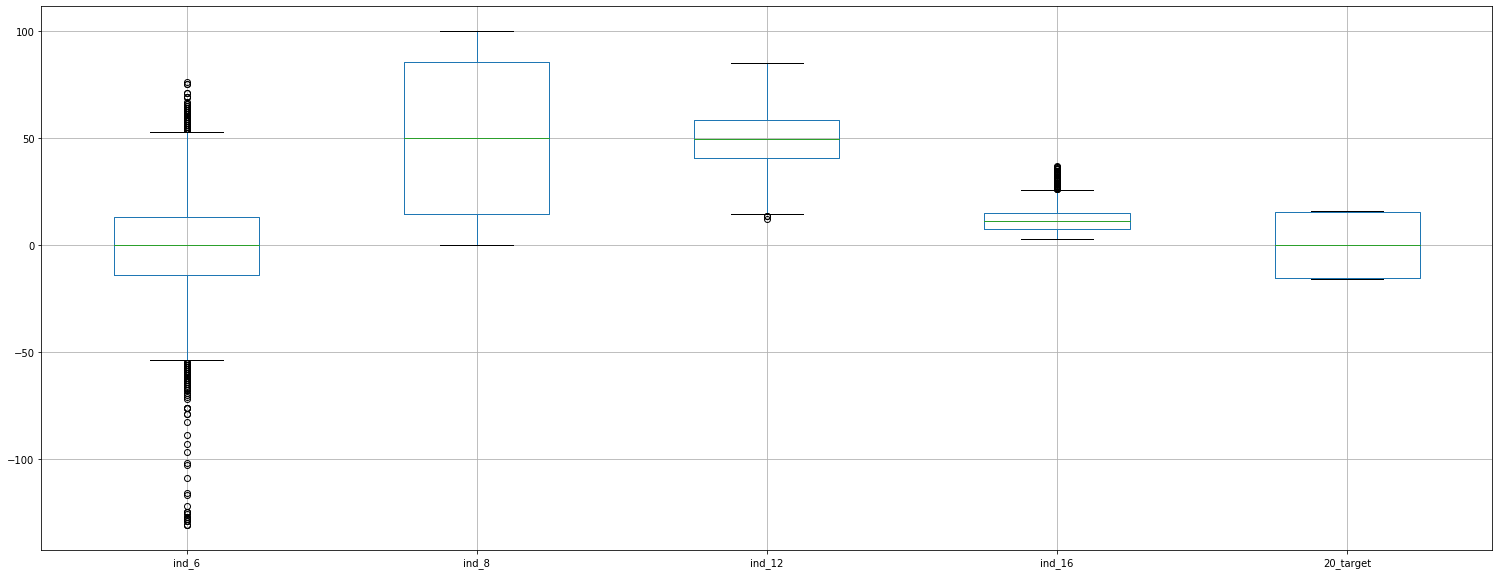

In [15]:


plt.figure(figsize=(26,10))
df.boxplot()
plt.show()



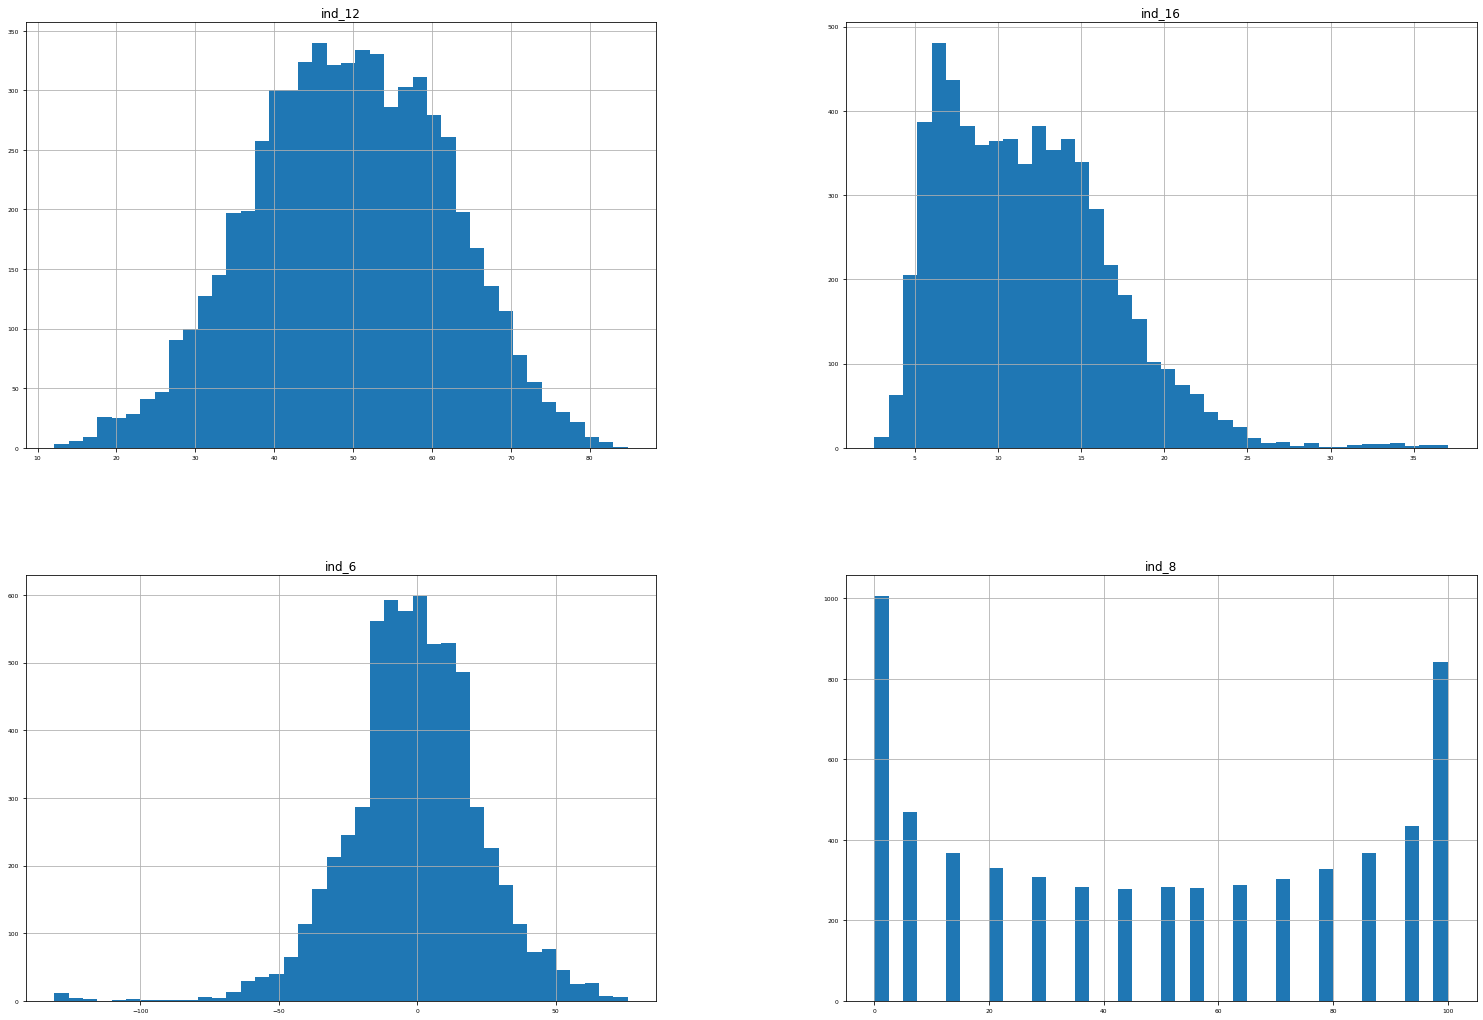

In [17]:
data_df = df.drop(["20_target"], axis=1)
data_df.hist(figsize=(26,18), bins=40, xlabelsize=6, ylabelsize=6)
plt.show()

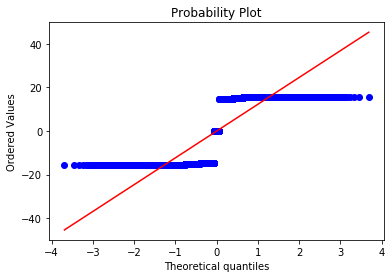

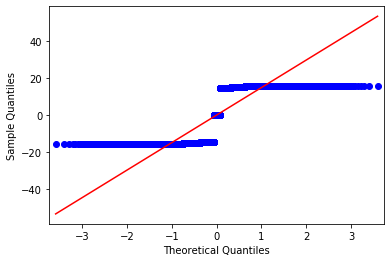

In [20]:
import scipy.stats as stats
import pylab

# 20_target normalden mi geliyor diye bakıyoruz.
stats.probplot(df["20_target"], dist = "norm", plot = pylab)
pylab.show()

import statsmodels.api as sm
sm.qqplot(df["20_target"], line = "s")
pylab.show()

In [21]:
df=df.dropna()

In [22]:
X = df.drop('20_target', 1)
y =df['20_target']

In [23]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler



X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
print(X_train)
print(y_test)

      ind_6       ind_8     ind_12  ind_16
1422     19   71.428571  58.024296    7.92
5551    -24   14.285714  37.181698    4.60
2998     -8    0.000000  44.773951    7.77
4717    -28    0.000000  49.832583   15.29
5869     38   78.571429  62.857871   22.98
...     ...         ...        ...     ...
4931    -12   57.142857  41.076369    5.85
3264    -11    0.000000  52.295570   10.73
1653      3   50.000000  50.088285    6.04
2607     37  100.000000  71.605934   13.51
2732     21  100.000000  67.998080   10.47

[4933 rows x 4 columns]
1411    15.460396
4757    14.788697
4822   -14.810957
1657   -15.595088
4933   -14.726067
          ...    
3151   -15.438010
933      0.000000
2832    15.600873
3595   -15.608545
2177    15.603766
Name: 20_target, Length: 1234, dtype: float64


In [24]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [26]:
from sklearn.decomposition import PCA

pca = PCA()
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [27]:
explained_variance = pca.explained_variance_ratio_
print(explained_variance)

[0.56463154 0.25158497 0.12925059 0.0545329 ]


In [28]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict


lm = sm.OLS(y_train, np.asarray(X_train))
model = lm.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              20_target   R-squared (uncentered):                   0.007
Model:                            OLS   Adj. R-squared (uncentered):              0.006
Method:                 Least Squares   F-statistic:                              8.252
Date:                Mon, 10 Aug 2020   Prob (F-statistic):                    1.25e-06
Time:                        02:33:32   Log-Likelihood:                         -20293.
No. Observations:                4933   AIC:                                  4.059e+04
Df Residuals:                    4929   BIC:                                  4.062e+04
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.2499      0.140     -1.781      0.075      -0.525       0.025
x2             0.2322      0.210      1.105      0.269      -0.180       0.644
x3             1.5541      0.293      5.300      0.000       0.979       2.129
x4             0.3271      0.451      0.724      0.469      -0.558       1.212
==============================================================================
Omnibus:                    17999.715   Durbin-Watson:                   1.986
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              758.334
Skew:                           0.024   Prob(JB):                    2.14e-165
Kurtosis:                       1.080   Cond. No.                         3.22
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [29]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression


In [30]:
k_t = pd.DataFrame({"gercek_y":y[0:10], "tahmin_y":model.predict(X)[0:10]})
k_t["hata"] = k_t["gercek_y"] - k_t["tahmin_y"]
k_t["hata_kare"] = k_t["hata"]**2
k_t

,gercek_y,tahmin_y,hata,hata_kare
0,15.135802,135.270407,-120.134605,14432.323225
1,15.143348,137.902888,-122.759540,15069.904639
2,15.146870,138.016449,-122.869580,15096.933623
3,15.153283,139.014206,-123.860923,15341.528187
4,-15.179065,145.455455,-160.634519,25803.448841
5,-15.176927,142.412384,-157.589311,24834.390884
6,-15.176298,140.902992,-156.079290,24360.744865
7,-15.172902,134.194039,-149.366942,22310.483234
8,-15.164979,122.444592,-137.609572,18936.394183
9,-15.167369,120.701836,-135.869205,18460.440878


Leverage v.s. Studentized Residuals


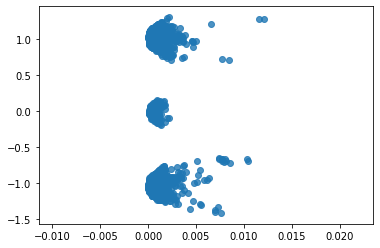

In [31]:
influence = model.get_influence()
resid_student = influence.resid_studentized_external
(cooks, p) = influence.cooks_distance
(dffits, p) = influence.dffits
leverage = influence.hat_matrix_diag
print("Leverage v.s. Studentized Residuals")
sns.regplot(leverage, model.resid_pearson, fit_reg=False)